# Explore Music Popularity Decay

### Imports

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns

### Data Imports

In [101]:
df_track = pd.read_csv('data_clean/track.csv')
df_album = pd.read_csv('data_clean/album.csv')
df_artist = pd.read_csv('data_clean/artist.csv')
df_rating = pd.read_csv('data_clean/rating.csv')
df_similar = pd.read_csv('data_clean/track_similarity.csv')

In [102]:
def get_artist_id(artist_name):
    return df_artist[df_artist['name'] == artist_name]['artist_id'].values[0]

def get_album_id(album_name):
    return df_album[df_album['name'] == album_name]['album_id'].values[0]

def get_track_id(track_name):
    return df_track[df_track['title'] == track_name]['track_id'].values[0]

# ====================================================

def get_all_tracks_by_artist(artist_id, only_id=False):
    return df_track[df_track['artist_id'] == artist_id] if not only_id else df_track[df_track['artist_id'] == artist_id]['track_id']

def get_all_tracks_by_album(album_id, only_id=False):
    return df_track[df_track['album_id'] == album_id] if not only_id else df_track[df_track['album_id'] == album_id]['track_id']

def get_all_albums_by_artist(artist_id, only_id=False):
    return df_album[df_album['artist_id'] == artist_id] if not only_id else df_album[df_album['artist_id'] == artist_id]['album_id']

# ====================================================

def convert_track_id_to_name(track_id):
    return df_track[df_track['track_id'] == track_id]['title'].values[0]

def convert_album_id_to_name(album_id):
    return df_album[df_album['album_id'] == album_id]['name'].values[0]

def convert_artist_id_to_name(artist_id):
    return df_artist[df_artist['artist_id'] == artist_id]['name'].values[0]

In [103]:
# Calculate the daily listeners of a track
def get_daily_views(track_id):

    ret = list()

    # filter the track
    track_data = df_rating[df_rating['track_id'] == track_id]
    track_data = track_data.reset_index(drop=True)

    # for each row, get the number of listeners
    for row in range(len(track_data)):
        spotify_listeners = track_data['no_of_listeners_spotify'][row]
        lastfm_listeners = track_data['no_of_listeners_lastfm'][row]

        # if the listeners are not available, set them to 0
        if np.isnan(spotify_listeners):
            spotify_listeners = 0
        if np.isnan(lastfm_listeners):
            lastfm_listeners = 0

        # if not available for both, skip
        if spotify_listeners == 0 and lastfm_listeners == 0:
            continue

        # get the day   
        day = track_data['date'][row]

        # append the total number of listeners
        ret.append((int(spotify_listeners + lastfm_listeners), day))

    return ret



In [104]:
def plot_daily_rating(daily_rating):
    # plot the daily listeners over time
    plt.plot([x[1] for x in daily_rating], [x[0] for x in daily_rating])
    plt.xlabel('Date')
    plt.ylabel('Number of Listeners')
    plt.title('Daily Listeners of Shake It Off by Taylor Swift')

    # Set x-ticks to show only the first, center, and last dates
    x_labels = [daily_rating[0][1], daily_rating[len(daily_rating)//2][1], daily_rating[-1][1]]
    plt.xticks([0, len(daily_rating)//2, len(daily_rating)-1], x_labels)

    plt.show()

# make lambda function to get and plot the daily listeners of a track
get_and_plot_daily_rating = lambda track_name: plot_daily_rating(get_daily_views(get_track_id(track_name)))

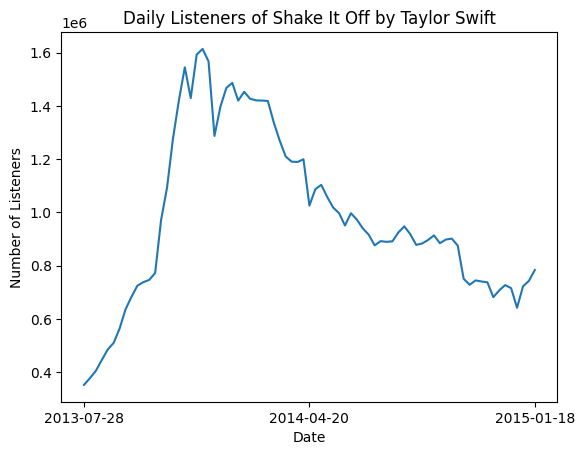

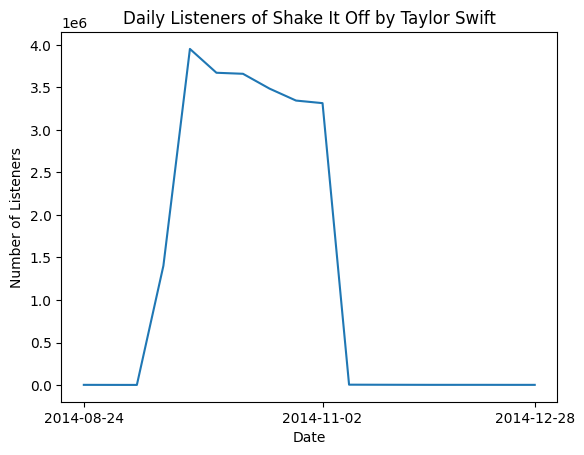

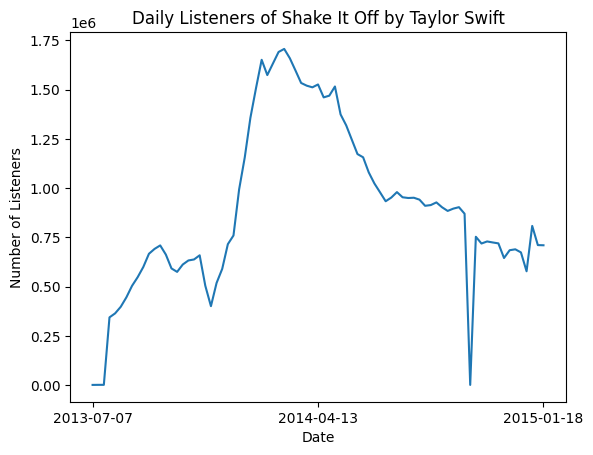

In [106]:
get_and_plot_daily_rating('Counting Stars')
get_and_plot_daily_rating('Shake It Off')
get_and_plot_daily_rating('Pompeii')